In [546]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import time

In [23]:
def plot_digit(x, index):
    image = x[index].reshape(16,16)

    plt.imshow(image, 'binary')
    plt.axis('off')
    plt.show()

In [16]:
def sign(x):
    if x<0:
        return -1.0
    else:
        return 1.0

In [597]:
def get_data(data_path):
    data = np.loadtxt(data_path)
    
    X = data[:, list(range(1, data.shape[1]))] 
    y = data[:, [0]]
    
    return X, y

In [613]:
def make_kernel(X1, X2, d):
    
    kernel_matrix = np.power(np.dot(X1, X2.T), d)

    return kernel_matrix.T 

In [591]:
def prediction(kernel_matrix, alpha, t):
    
    kernel_function = alpha*kernel_matrix[t]
    y_pred = np.sum(kernel_function, axis=1)
    number_predicted = np.argmax(y_pred)
    
    return (number_predicted)

In [592]:
def update_alpha(alpha, t, y_hat_index, y_index):
    
    alpha[y_hat_index][t] = alpha[y_hat_index][t] - 1
    alpha[y_index][t] = alpha[y_index][t] + 1
    return alpha

In [663]:
def epoch(kernel, alpha, x, y, update=False):
    m, n = x.shape
    num_correct = 0
    for t in range(m):
        y_hat = prediction(kernel, alpha, t)

        y_index = int(y[t])
        if y_hat == y_index:
            num_correct = num_correct + 1
        elif update:
            alpha = update_alpha(alpha, t, y_hat, y_index)
    return alpha, num_correct/m

## 123, ABC, baby you and me dataset

In [651]:
#Get data
x_train, y_train = get_data("dtrain123.dat")
x_test, y_test = get_data("dtest123.dat")
m_train, n_train = x_train.shape
m_test, n_test = x_test.shape
#1,2,3 -> 0,1,2
y_train = y_train - 1
y_test = y_test - 1

In [654]:
#Form data kernel
d = 1
train_kernel_matrix = make_kernel(x_train, x_train, d)
test_kernel_matrix = make_kernel(x_train, x_test, d)
#Number of classes
k = 3
#Initialisations
alpha = np.zeros((k, m_train))

In [655]:
for i in range(3):
    print("Train epoch:")
    alpha = epoch(train_kernel_matrix, alpha, x_train, y_train, True)
    print("Test epoch:")
    alpha = epoch(test_kernel_matrix, alpha, x_test, y_test, False)

Train epoch:
Fraction correct:  0.9088145896656535
Test epoch:
Fraction correct:  0.9692982456140351
Train epoch:
Fraction correct:  0.9665653495440729
Test epoch:
Fraction correct:  0.9517543859649122
Train epoch:
Fraction correct:  1.0
Test epoch:
Fraction correct:  0.9517543859649122


## Big Dataset (9298, 256)

In [619]:
#Get data
x, y = get_data("zipcombo.dat")

In [679]:
#Split dataset
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_cv, y_train, y_cv = train_test_split(x_training, y_training, test_size=0.25, random_state=1)
m_train, n_test = x_train.shape
m_test, n_test = x_test.shape
#Form data kernel
d = 1
train_kernel_matrix = make_kernel(x_train, x_train, d)
cv_kernel_matrix = make_kernel(x_train, x_cv, d)
test_kernel_matrix = make_kernel(x_train, x_test, d)
#Number of classes
k = 10
#Initialisations
alpha = np.zeros((k, m_train))

In [680]:
start = time.time()
prev_cv_accuracy = 0.0
prev_alpha = alpha
num_epochs = 20
for i in range(num_epochs):
    alpha, train_accuracy = epoch(train_kernel_matrix, alpha, x_train, y_train, True)
    print("Train epoch %i accuracy: %f " % (i, train_accuracy))
    alpha, cv_accuracy = epoch(cv_kernel_matrix, alpha, x_cv, y_cv, False)
    print("CV epoch %i accuracy: %f " % (i, cv_accuracy))
    if (prev_cv_accuracy > cv_accuracy):
        cv_accuracy = prev_cv_accuracy
        alpha = prev_alpha
        break
    prev_cv_accuracy = cv_accuracy
    #alpha, test_accuracy = epoch(test_kernel_matrix, alpha, x_test, y_test, False)
    #print("Test epoch %i accuracy: %f " % (i, test_accuracy))
    print("###################")
stop = time.time()
print(stop-start, "seconds")

Train epoch 0 accuracy: 0.834529 
CV epoch 0 accuracy: 0.891398 
###################
Train epoch 1 accuracy: 0.894944 
CV epoch 1 accuracy: 0.912366 
###################
Train epoch 2 accuracy: 0.907673 
CV epoch 2 accuracy: 0.885484 
9.95718002319336 seconds


In [689]:
def run(x, y, d, k, seed):
    
    seed = 1
    #Split dataset
    x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
    x_train, x_cv, y_train, y_cv = train_test_split(x_training, y_training, test_size=0.25, random_state=seed)
    m_train, n_test = x_train.shape
    m_test, n_test = x_test.shape
    #Form data kernel

    train_kernel_matrix = make_kernel(x_train, x_train, d)
    cv_kernel_matrix = make_kernel(x_train, x_cv, d)
    test_kernel_matrix = make_kernel(x_train, x_test, d)

    #Initialisations
    alpha = np.zeros((k, m_train))

    prev_cv_accuracy = 0.0
    prev_alpha = alpha
    num_epochs = 20
    for i in range(num_epochs):
        alpha, training_accuracy = epoch(train_kernel_matrix, alpha, x_train, y_train, True)
        #print("Train epoch %i accuracy: %f " % (i, train_accuracy))
        alpha, cv_accuracy = epoch(cv_kernel_matrix, alpha, x_cv, y_cv, False)
        #print("CV epoch %i accuracy: %f " % (i, cv_accuracy))
        if (prev_cv_accuracy > cv_accuracy):
            alpha = prev_alpha
            alpha, train_accuracy = epoch(train_kernel_matrix, alpha, x_train, y_train, False)
            alpha, cv_accuracy = epoch(cv_kernel_matrix, alpha, x_cv, y_cv, False)
            alpha, test_accuracy = epoch(test_kernel_matrix, alpha, x_test, y_test, False)
            break
        prev_cv_accuracy = cv_accuracy
        
    return alpha, train_accuracy, cv_accuracy, test_accuracy

In [690]:
run(x, y, d, k, seed=1)

(array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
        [-2.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 0.9218357834349229,
 0.885483870967742,
 0.10698924731182796)

In [674]:
start = time.time()
num_epochs = 20
for i in range(num_epochs):
    alpha, train_accuracy = epoch(train_kernel_matrix, alpha, x_train, y_train, True)
    print("Train epoch %i accuracy: %f " % (i, train_accuracy))
    alpha, cv_accuracy = epoch(cv_kernel_matrix, alpha, x_cv, y_cv, False)
    print("CV epoch %i accuracy: %f " % (i, cv_accuracy))
    alpha, test_accuracy = epoch(test_kernel_matrix, alpha, x_test, y_test, False)
    print("Test epoch %i accuracy: %f " % (i, test_accuracy))
    print("###################")
stop = time.time()
print(stop-start, "seconds")

Train epoch 0 accuracy: 0.947651 
CV epoch 0 accuracy: 0.885484 
Test epoch 0 accuracy: 0.902151 
###################
Train epoch 1 accuracy: 0.954285 
CV epoch 1 accuracy: 0.906452 
Test epoch 1 accuracy: 0.910215 
###################
Train epoch 2 accuracy: 0.952850 
CV epoch 2 accuracy: 0.901613 
Test epoch 2 accuracy: 0.912903 
###################
Train epoch 3 accuracy: 0.955719 
CV epoch 3 accuracy: 0.925269 
Test epoch 3 accuracy: 0.929570 
###################
Train epoch 4 accuracy: 0.956436 
CV epoch 4 accuracy: 0.908602 
Test epoch 4 accuracy: 0.916129 
###################
Train epoch 5 accuracy: 0.954823 
CV epoch 5 accuracy: 0.905376 
Test epoch 5 accuracy: 0.919892 
###################
Train epoch 6 accuracy: 0.953209 
CV epoch 6 accuracy: 0.909677 
Test epoch 6 accuracy: 0.925806 
###################
Train epoch 7 accuracy: 0.952492 
CV epoch 7 accuracy: 0.904839 
Test epoch 7 accuracy: 0.916129 
###################
Train epoch 8 accuracy: 0.966296 
CV epoch 8 accuracy: 0

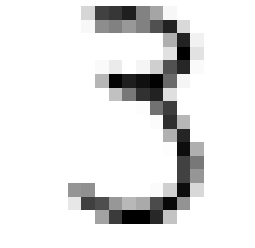

In [28]:
plot_digit(x_train, 11)